In [93]:
import pandas as pd

data_dir = "./data/"
file_name = "ingredients.csv"

data = pd.read_csv(data_dir+'molecules.csv')
print(data.head())

   pubchem id                                        common name  \
0           4                                 1-Aminopropan-2-ol   
1      100031  4-Isopropenyl-1-methyl-7-oxabicyclo[4.1.0]hept...   
2        1001                                     Phenethylamine   
3       10037                                             Allene   
4      101010                    2-Methyl-4-propyl-1,3-oxathiane   

                                      flavor profile  
0                                          {'fishy'}  
1                             {'spearmint', 'minty'}  
2                            {'fishy', 'ammoniacal'}  
3                                               {''}  
4  {'tropica', 'tropical', 'green', 'pineapple', ...  


# Statistics

In [107]:
## Dimension of molecules*attributes ##
print("Dimension of molecules*attributes: ", data.shape)

Dimension of molecules*attributes:  (1788, 3)


In [108]:
import ast

flavor = set()
for mol in data['flavor profile']:
    flavor.update(ast.literal_eval(mol))

## unique flavor descriptors ##
print("unique flavor descriptors: ", len(flavor))

unique flavor descriptors:  599


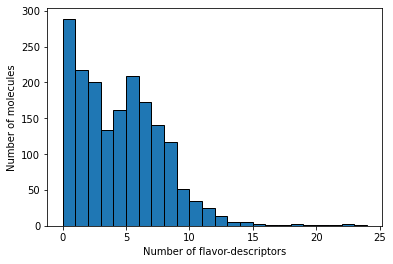

In [85]:
import matplotlib.pyplot as plt

flavor_len = []
for mol in data['flavor profile']:
    temp = list(ast.literal_eval(mol))
    if temp==['']:
        flavor_len.append(0)
    else:
        flavor_len.append(len(temp))

## plot molecules-descriptors ##
plt.hist(flavor_len, bins=range(min(flavor_len), max(flavor_len)),edgecolor="black")
plt.ylabel('Number of molecules')
plt.xlabel('Number of flavor-descriptors')
plt.show()

In [100]:
## ingredients.csv file contains a list of ingredients, constitutents molecules and other attributes ##

ingredients = pd.read_csv(data_dir+'ingredients.csv')
print(ingredients.head())

   entity id            alias                       synonyms scientific name  \
0          0              egg                        {'egg'}         chicken   
1          1  bakery products            {'bakery products'}        poacceae   
2          2            bread                      {'bread'}        poacceae   
3          3        rye bread                  {'rye bread'}             rye   
4          4    wheaten bread  {'soda scones', 'soda farls'}           wheat   

         category                                          molecules  
0  animal product  {6274, 5311110, 644104, 9609, 18827, 527, 1960...  
1          bakery          {27457, 7976, 31252, 26808, 22201, 26331}  
2          bakery  {1031, 1032, 644104, 527, 8723, 31260, 15394, ...  
3          bakery  {644104, 7824, 643731, 8468, 1049, 5372954, 80...  
4          bakery  {5365891, 6915, 1146, 12170, 8082, 31251, 7958...  


In [109]:
## Number of ingredients and their attributes ##

print("Number of ingredients and their attributes: ", ingredients.shape)

Number of ingredients and their attributes:  (936, 6)


Total number of ingredient's category:  35
Ingredient's categories
beverage alcoholic: 4.7
vegetable fruit: 0.43
meat: 5.02
spice: 2.67
cabbage: 1.71
fruit citrus: 1.07
plant: 4.81
vegetable tuber: 1.07
gourd: 0.85
vegetable: 2.56
additive: 2.67
fish: 12.82
seed: 0.53
dairy: 5.13
flower: 0.96
fungus: 1.18
herb: 5.45
bakery: 3.42
vegetable root: 0.85
legume: 2.46
berry: 4.49
nut: 2.24
maize: 0.64
vegetable stem: 0.11
animal product: 0.11
cereal: 2.46
seafood: 3.74
fruit essence: 0.11
beverage caffeinated: 0.75
fruit-berry: 0.11
dish: 8.23
essential oil: 4.49
fruit: 8.65
beverage: 1.39
plant derivative: 2.14


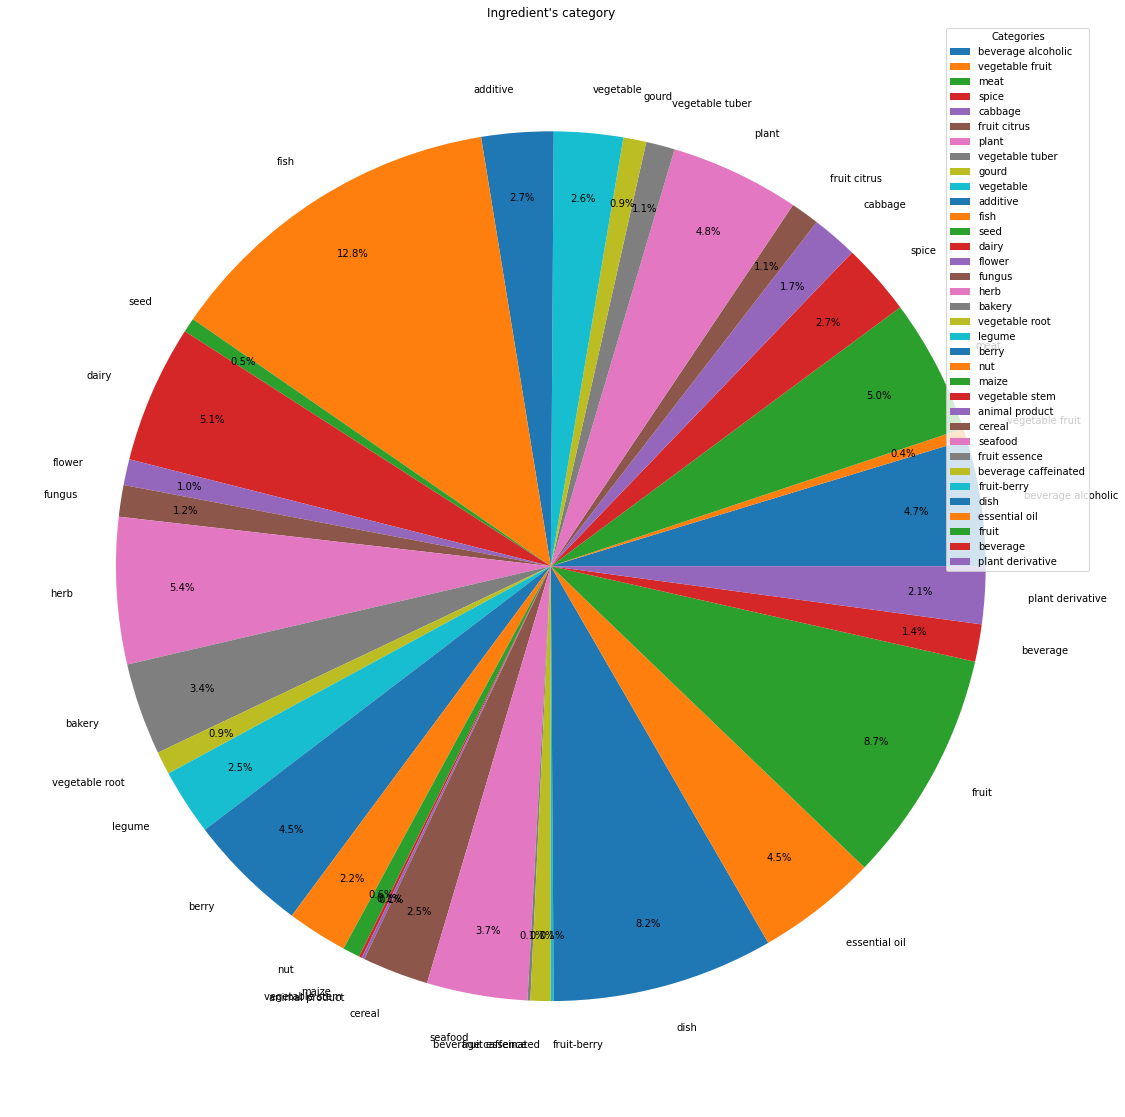

In [140]:
## plot category distribution of ingredients ##

category = list(ingredients['category'])
category_label = list(set(category))

print("Total number of ingredient's category: ", len(category_label))

print("Ingredient's categories")
freq = []
for k in range(len(category_label)):
    freq.append(category.count(category_label[k]))
    print(f'{category_label[k]}: {round(freq[k]*100/ingredients.shape[0], 2)}')
  
fig = plt.figure(figsize =(20, 20))
plt.pie(freq, labels = category_label, autopct='%1.1f%%',pctdistance=0.85)
plt.legend(category_label, loc="upper right", title="Categories")
plt.title("Ingredient's category")
plt.show()

In [173]:
## Remove duplicates element in the dataset ##
df={}
for k in range(ingredients.shape[0]):
    temp = sorted(list(ast.literal_eval(ingredients['molecules'][k])))
    df[ingredients['entity id'][k]]=temp
print("Length of original list of ingredients: ", len(df))

## flip key and value in dictionary ##
rev_df={}
temp = {str(val) : key for key, val in df.items()}
rev_df = {val : key for key, val in temp.items()}

print("Length of ingredient's list after removing duplicate elements : ",len(rev_df))

Length of original list of ingredients:  936
Length of ingredient's list after removing duplicate elements :  500
